# SimCADO Filters Experiment

## Lightning summary
For the full results, ideas and conclusion, see [the bottom of this notebook](#Summary)

Here is the table with the amin results. In order to maintain the level of flux leaking through the filter wings, the filters will need the following tranmsission coefficients and a thermal-red (>2.35um) blocking filter in the other filter wheel.

In [87]:
print("Required wing transmission and total leaked flux fraction"); summary_tbl2

Required wing transmission and total leaked flux fraction


Filter,Blue Wing,Red Wing,A0V,M5V,Sky
str8,float64,float64,float64,float64,float64
J,0.006,0.0001,0.0104,0.0046,0.0119
H,0.004,0.002,0.0102,0.0051,0.0108
Ks,0.0015,0.03,0.0095,0.0056,0.0099
Pa-Beta,0.0004,1.5e-05,0.0106,0.0055,0.0106
H-cont,0.0002,0.00015,0.0087,0.0058,0.009
Br-Gamma,0.0001,0.0007,0.0096,0.0064,0.0103


### Context
Procuring a set of large filters for MICADO is an expensive endevour. In an ideal world the blocking capabilities of a filter outside of the specified filter range would be perfect. Unfortunately the world is not ideal and the cost of producing a filter increases with the filters ability to block the light in the so-called wings of the filter, i.e. at the wavelength outside the spectral region of interest. To maintain a photometric accuracy of 0.01 mag, the light seeping through the filter wings must be less than 1% of the integrated light coming through the filter's designated wavelength range. In this notebook I attempt to determine the blocking coefficients required for a series of filters across the wavelength range to which MICADO is sensitive.

### Code
The code for this is included at the bottom of the notebook, and also in the SimCADO submodule ``simcado.experiments.filter_wings``. See the docstrings for each function for documentation.

When running the code I have told SimCADO not to take into account photon shot noise in order to get accurate values on the incoming flux. For the stars, all other sources of light (atmosphere, mirror blackbody emission) were turned off. When running the sky source, SimCADO also adds in the mirror blackbody emission.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from astropy.table import Table

import simcado as sim
import simcado.experiments.filter_wings as fwex

### Source Spectra
As there is a veritable zoo of different celestial objects, each with a unique spectrum, one cannot just assume a flat light source. Here I use the following sources: A0V, M5V and the sky emission according to the [ESO SkyCalc tool](https://www.eso.org/observing/etc/bin/gen/form?INS.MODE=swspectr+INS.NAME=SKYCALC). The following graph is solely for illustration purposes - the units vary for each spectrum. As we are looking for the relative flux difference per filter, the units don't matter.

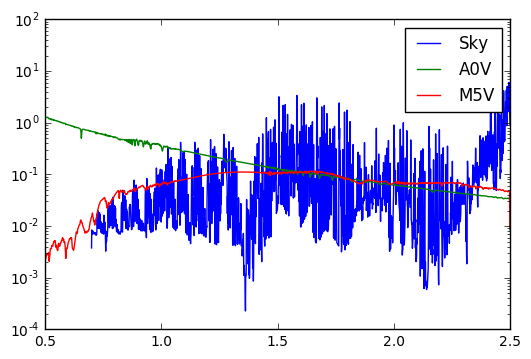

In [4]:
stars = [sim.source.star(mag=20, filter_name="H", spec_type=spt) for spt in ["A0V", "M5V"]]
sky = sim.spectral.EmissionCurve(filename=sim.utils.__pkg_dir__+"/data/skytable.fits")
plt.plot(sky.lam, sky.val)
for star in stars: plt.plot(star.lam, star.spectra[0]*star.weight[0])
plt.semilogy()
plt.xlim(0.5,2.5); plt.ylim(1E-4, 1E2)
plt.legend(("Sky", "A0V", "M5V"))

### FIlter Set
For the purpose of explaining the proceedure I will use a the H-band filter. The reults will then be applied to the following filters

| Name | $\lambda_{Blue}$ [um] | $\lambda_{Red}$ [um] | $\Delta \lambda$ [um] |
|------|-------------|------------|------------------|
| J | 1.155 | 1.335 | 0.180 |
| H | 1.490 | 1.780 | 0.290 |
| Ks | 1.970 | 2.320 | 0.350 |
| Pa-$\beta$ | 1.2779 | 1.2950 | 0.017 |
| H-cont | 1.5685 | 1.5915 | 0.023 |
| Br-$\gamma$ | 2.1589 | 2.1878 | 0.029 |

For the sake of this experiment, all filter curves are assumed to be top-hats with a transmission coefficient of 1 between the red and blue cutoffs. The determination of the wing transmission coefficients is our goal and so there will be set as needed. The range of transmission will be between 1E-4 and 1E-2. The edges of the spectral range for these simulations are at 0.3um and 3.0um. 

All transmission curves along the MICADO optical train are taken into account when calculating flux. All curves except the filter curve remains the same throughout this experiment. The curve that has the most influence on how many photons are recorded, aside from the filters, is the detector QE curve. As the H4RG QE curve is not yet publically available, we are assuming it will be similar to the H2RG curve that is provided with SimCADO. 

## H band filter (broad band)
We begin by finding the flux of each of out objects through a certain spectral window. Here we define the blue wing to be all wavelengths bluewards of $\lambda_{blue}$, the red wing to be all wavelengths redwards $\lambda_{red}$ and the filter to be between these two cutoff. Later we will split the red wing into two sections: the near red wing ($<2.3um$) and the thermal red wing ($>2.3um$), but for now lets just use the generic red and blue wings. 

For each spectral window for the H-band filter (0.3-1.49um, 1.49-1.78um and 1.78-3.0um), a top hat filter curve is created and then combined with transmission curve of the E-ELT+MICADO optical train. These combined transmission curves are then applied to the stellar and sky spectra and the the resulting light spectrum is integrated. This gives a measure for the flux through each of these windows if there were no filter in place. The fluxes for the wings are scaled by assuming a uniform transmission coefficient in the wings (e.g. 1E-2), and the resulting flux is compared to that coming through the actual filter window. By using various transmission coefficients for the wings we can get a feeling for percentage of light in the wings the filters need to block in order to stay under the 1% limit.

[ 1.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.]
[ 0.  0.  0.  0.  1.  1.]
[ 0.3    1.49   1.491  1.78   1.781  3.   ]
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')


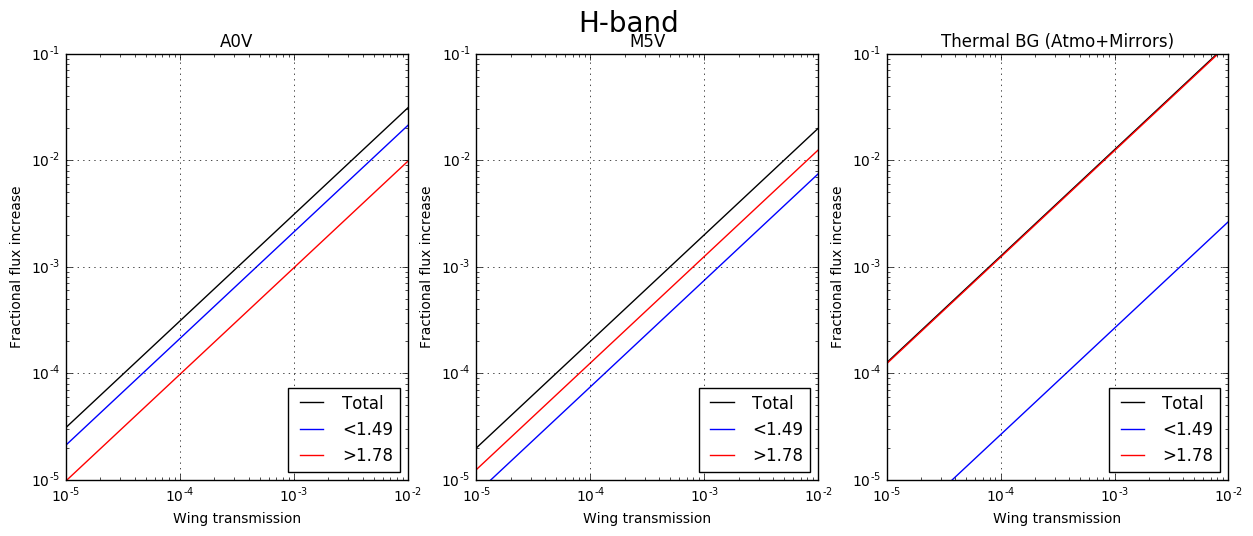

In [5]:
spec_types = ['A0V', 'M5V']
wavelengths = [1.49, 1.78]
fluxes = fwex.get_filter_wings_flux(wavelengths=wavelengths, spec_types=spec_types,
                                    filter_name="H-band", return_fluxes=True,
                                    SIM_VERBOSE="no", make_plot=True)

The above plot shows the fractional increase in flux for different transmission coefficients in the wings. The black line shows the total increase in flux due to leakage through both red and blue wings, the red line is the increase in flux due to leakage through the red wing, and the same for blue line through the blue wing. As expected the blue wing contributes 5x more to the total leaked flux for a A0V star that the red wing. For a M5V star, the red and blue wings contribute almost equally to the leaked flux. For the sky background though, the contribution from the red wing is ~25x greater than from the blue wing. 

The majority of this leaked flux is due to the massive increase in atmospheric emission redwards of 2.3um. This becomes visible if we split the red wing into two windows, redwards and bluewards of 2.3um.

[ 1.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  1.]
[ 0.3    1.49   1.491  1.78   1.781  2.35   2.351  3.   ]
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
(2.9900000000000002, 2.9990000000000001) (0.29999999999999999, 2.5)


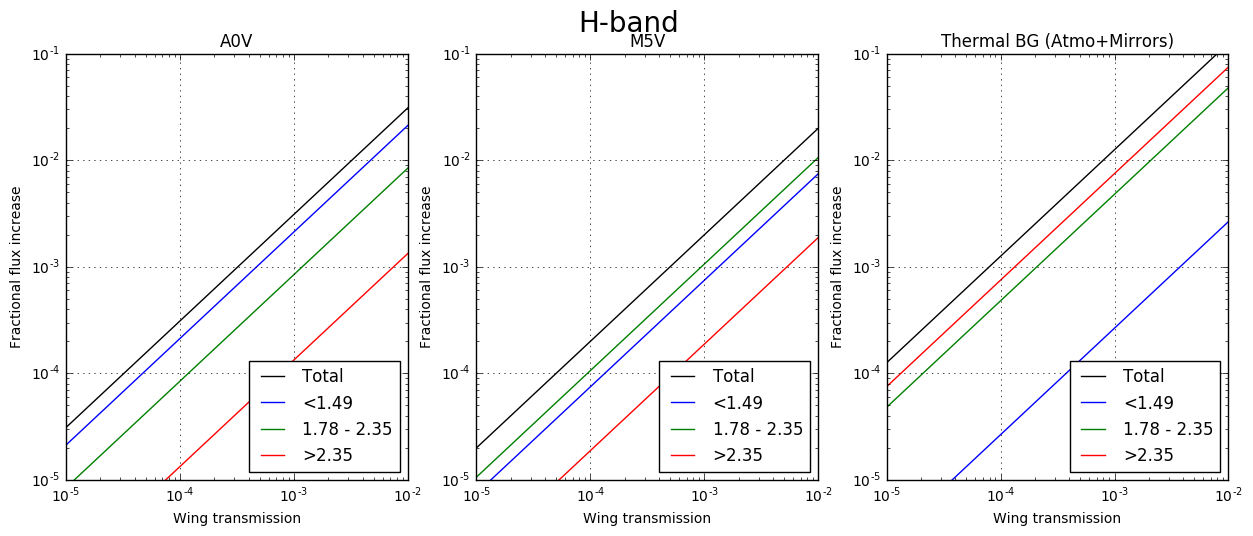

In [6]:
wavelengths2 = [1.49, 1.78, 2.35]
fluxes2 = fwex.get_filter_wings_flux(wavelengths=wavelengths2, spec_types=spec_types,
                                     filter_name="H-band", return_fluxes=True,
                                     SIM_VERBOSE="no", make_plot=True)

Here we see the the atmospheric emission redwards of 2.3um is almost an order of magnitude greater than that in the near-red window. For the stars, the blue wing is still the greater source of leaked light.

We will return to the thermal red window later on. In the following sections we'll only deal with the blue and the full red wing to illustrate the method behind experiment.

### Total wing flux leakage

As we are aiming to keep the total amound of flux transmissed through the wings to below 1%. This could be achieved for a broadband H filter by applying a requiring a blanket wing transmission coefficient of 1E-3. However this brings with it extra production costs which may not be necessary. 

We can look at the contribution to the flux leakage from each window to get a better idea of which windows need the most attention. 

Name,<1.49,>1.78,Total
str3,float64,float64,float64
A0V,0.00212520568771,0.000979969398187,0.0031051750859
M5V,0.000745904016805,0.00124840021529,0.00199430423209
Sky,0.000265820313024,0.0122984059478,0.0125642262608


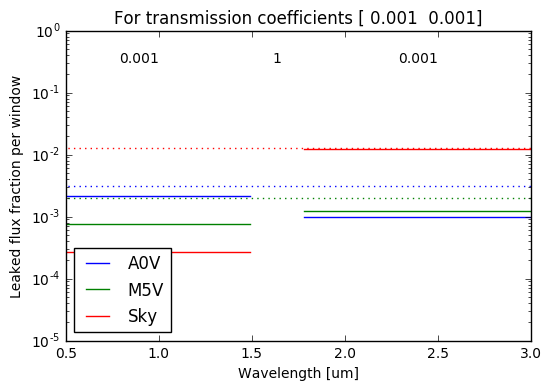

In [7]:
tc_coeffs = 1E-3
fwex.get_total_wing_leakage(fluxes, wavelengths, transmission_coeffs=tc_coeffs, 
                            edges=[0.3,3.0], filter_index=1, 
                            row_names=spec_types+["Sky"], make_plot=True)

If we were to apply a blanket transmission coefficient of 1E-3 to both wings, we see that the goal of a $<$1% flux increase is achieved for all sources (stars and sky background). The solid lines in the plot above show the integrated flux per wing relative to the total flux coming through the filter. Note that this is **not** a wavelength dependent graph, rather the integrated flux over the window - hence the flat curve. The extent of the flat line is to show the extent of the window used for the integration. The dotted lines show the level of the total flux leaked through the wings integrated over the whole wavelength range of the wings.

The table above the plot shows the fraction of flux though a wing window compared to the flux through the filter. The column "total" is the combined flux of all wing windows (blue, red) compared to the flux through the filter.

The flux leakage is the blue wing is dominated by the stars and so the transmission coefficient for the blue wing must be chosen to reflect this. It can however be relaxed slightly from the value of 1E-3. From the table above we can roughly estimate that a transmission coefficient of 2E-3 for the blue wing would surfice to provide a flux accuracy of 1%. 

Leakage in the red wing is most problematic for the sky background. A transmission coefficient of 1E-3 will just be enough to hold the increase in flux to the 1% level. If we were to ignore the sky background and only concentrate on the increase in flux from stars, then the transmission coefficient could be relaxed to almost 1E-2. However this would mean that the backgournd level would increase by ~10%. However as the increase in background would be uniform over the field of view, this would simply lead to a higher background noise. The photometric accuracy for on-sky object would remain unaffacted.

## Wing transmission coefficients to maintain a <1% flux increase
The most leanient wing transmission coefficients that allow us to maintain a 1% flux increase for the three sources of light can be found by diving the desired fractional flux increase by the relative flux through a wing window. The reults are shown in the graph below. A caviat for the graph is that the each wing contributes 50% of the leaked flux to the 1% flux increase budget. There is a bit of wiggle room here regarding this assumption, as we will see later on.

Name,<1.49,>1.78
str3,float64,float64
A0V,0.00235271344742,0.00510220013936
M5V,0.00670327533751,0.00400512587132
Sky,0.0188096987138,0.000406556753877


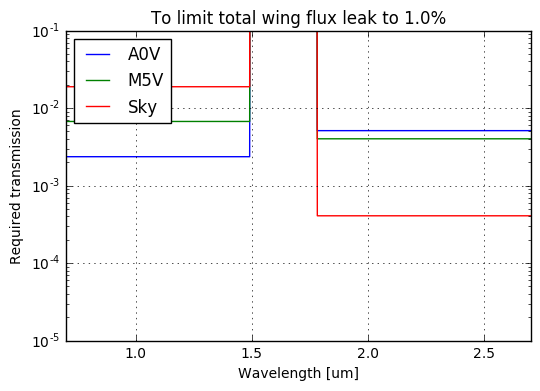

In [8]:
dflux = 0.01
fwex.required_transmission(fluxes, total_flux_increase=dflux, filter_index=1,
                            wavelengths=wavelengths, row_names=spec_types+["Sky"],
                            make_plot=True)

The graph above essentially shows the transmission curves needed to maintain an increase in flux due to wing leakage of less than 1% for our three sources. On the blue wing, accurate photometry of blue stars requires that the transmission be no greater than 1E-3. On the red wing, it is the sky background which dominates the leaked flux. To restrict this to <1% the red wing transmission would need to be less than 5E-4. 

By using the transmission coefficients given here for an A0V star (~1E-3 for the blue wing and ~6E-3 for the red wing, we can confirm the increase in flux is keep to <1% for the A0V star, however the the sky background increases by 6.2%. Thus we need to choose the transmission coefficients for each wing based on the source that has the largest influence on the lux leakage.

Name,<1.49,>1.78,Total
str3,float64,float64,float64
A0V,0.00212520568771,0.00587981638912,0.00800502207683
M5V,0.000745904016805,0.00749040129172,0.00823630530852
Sky,0.000265820313024,0.0737904356869,0.0740562559999


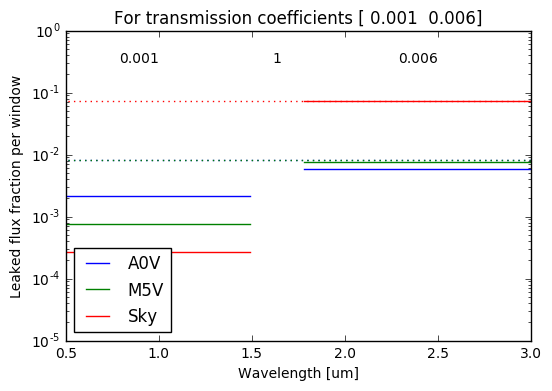

In [9]:
tc_coeffs = [1E-3, 6E-3]
fwex.get_total_wing_leakage(fluxes, wavelengths, tc_coeffs, row_names=spec_types+["Sky"])

As mentioned above, we can aportion the leaked flux differently and still maintain a <1% increase. If we relax and strengthen the wing transmission coefficients to 2E-3 and 1E-3 for the blue and red wings respectively, we maintain a flux leakage of ~1.1% regardless of the source.

Name,<1.49,>1.78,Total
str3,float64,float64,float64
A0V,0.00425041137542,0.000979969398187,0.00523038077361
M5V,0.00149180803361,0.00124840021529,0.0027402082489
Sky,0.000531640626048,0.0122984059478,0.0128300465739


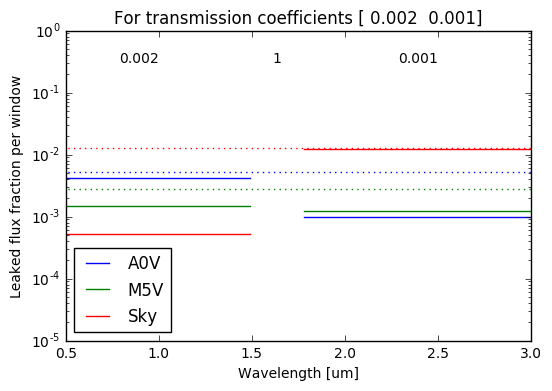

In [10]:
tc_coeffs = [2E-3, 1E-3]
fwex.get_total_wing_leakage(fluxes, wavelengths, tc_coeffs, row_names=spec_types+["Sky"])

## Spliting the red wing into near-red and thermal-red windows

As can be seen from the graph above, the amount of stellar flux leaked by the red wing is an order of magnitude less than the flux from the atmospheric background. The vast amjority of this flux comes from the thermal background of the atmosphere, redwards of 2.3um. Questions remain about whether or not we actually need to filter out this increase in background flux due to its quasi homogenous distribution over the focal plane. However if we do wish to filter it out, we have two options: 
1. manufacture all filters in such a way as to block the full red wing down to a level of 1E-3, or 
2. take advantage of MICADO's second filter wheel and manufacture a seperate thermal red filter, with the sole purpose of blocking light redwards of ~2.3um. This would allow us to relax the requirements on the red wing of all other filters.

Considering that MICADO has ~30 filter slots and that filters aren't cheap, it is worth investigating this second option. The first step is to find the border between the near-red and thermal-red wings. The sky emission spectrum from earlier can be uses as a guide.

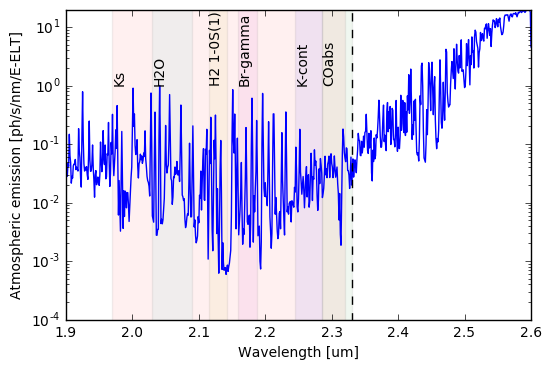

In [11]:
plt.plot(sky.lam, sky.val)
plt.semilogy()
plt.xlim(1.9,2.6); plt.ylim(1E-4, 2E1)
plt.ylabel("Atmospheric emission [ph/s/nm/E-ELT]"); plt.xlabel("Wavelength [um]")

import matplotlib.patches as patches
x = [1.970, 2.2859, 2.2455, 2.1589, 2.1147, 2.0300]
w = [0.35, 0.044, 0.040, 0.029, 0.028, 0.060]; c="rgbmyc"
text = ["Ks", "COabs", "K-cont", "Br-gamma", "H2 1-0S(1)", "H2O"]
for xx, ww, clr, t in zip(x, w, c, text): 
    plt.gca().add_patch(patches.Rectangle((xx, 1E-5), ww, 20, alpha=0.06, facecolor=clr))
    plt.text(xx, 1, t, rotation=90, verticalalignment="bottom", horizontalalignment="left")

plt.plot([2.33, 2.33], [1E-5,1E2], "k--")

Based on the wavelength coverage of the filters in the K-band, it makes sense to set the thermal-red wing border to 2.35um. This way the thermal-red filter can be used in conjunction with the whole selection of filters currently slated for use in MICADO, including the Ks and CO absortion-band filters.

At this point lets run the function that gives us the "required" transmission curve to achieve the <1% flux increase requirement. **Note** the caveat that this function calculates the transmission coefficients based on a flux leakage of 0.33% for each window. Hence the transmission curve that is produced for each source (stars, sky) should be used only to guide the decision on transmission coefficients.

As transmission coefficients are multiplicitive, the thermal-red filter needed have an extremely low transmission redwards of 2.35um. A factor of 0.01 additionally to the ~1E-3 already built into the scientific filters (total ~1E-5 at >2.35um) may be sufficient to effectively remove the thermal-red part of the spectrum.

Name,<1.49,1.78 - 2.35,>2.35
str3,float64,float64,float64
A0V,0.00156847563161,0.0039427528111,0.0249543885447
M5V,0.00446885022501,0.00314713718716,0.0177444776964
Sky,0.0125397991426,0.000694510042235,0.000444512050761


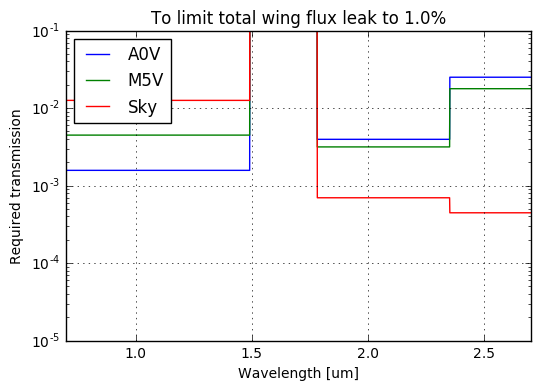

In [12]:
dflux = 0.01
fwex.required_transmission(fluxes2, total_flux_increase=dflux, filter_index=1,
                           wavelengths=wavelengths2, row_names=spec_types+["Sky"],
                           make_plot=True)

Again we see that the transmission coefficient for the blue wing needs to be strictest in order to block the blue excess in early type stars and strictest in the red wing to block the atmosphere. By using thermal-red filter with a transmission coefficient of 1E-2, the requirement on the near-red wing can be relaxed to 2.5E-3. The blue-wing coefficient must stay at 1.5E-3 in order to the maintain photometric accuracy of the early type stars.

Name,<1.49,1.78 - 2.35,>2.35,Total
str3,float64,float64,float64,float64
A0V,0.00318780853156,0.00211358249745,3.33942597648e-06,0.00530473045499
M5V,0.00111885602521,0.00264790914337,4.6962967724e-06,0.00377146146535
Sky,0.000398730469536,0.0119988665772,0.000187471482923,0.0125850685297


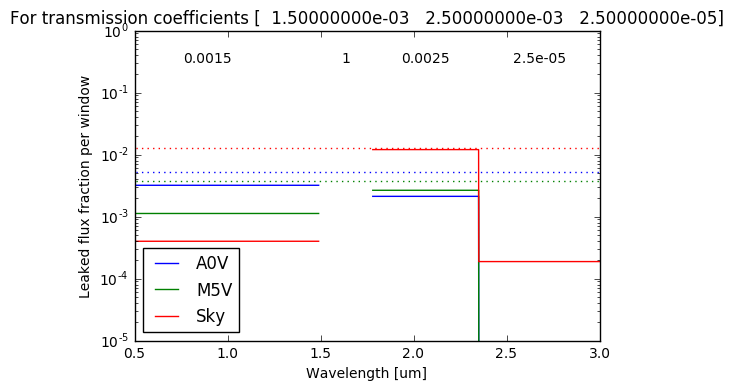

In [13]:
tc_coeffs2 = [1.5E-3, 2.5E-3, 2.5E-5]
fwex.get_total_wing_leakage(fluxes2, wavelengths2, tc_coeffs2, row_names=spec_types+["Sky"])

### Moving the thermal-red border to 2.2um and moving the K-cont filter

For argument's sake lets say we can use a different window for the K-continuum filter and the CO-absorption filter and K-band filter won't be used together with the thermal-red filter. Then we could move the thermal-red border bluewards to 2.2um. By doing so we would increase the percentage of thermal atmospheric light blocked and be able to relax the near-red wing even further.

A transmission coefficient of 1E-4 for the thermal-red window allows the requirement on the near-red window to be relaxed to 8E-3. However by relaxing the near-red window an extra 0.5% of the A0V star's flux leaks though, which in turn forces a stricter transmission requirement for the blue wing of 1.2E-3.

In [54]:
spec_types = ['A0V', 'M5V']
wavelengths25 = [1.49, 1.78, 2.2]
fluxes3 = fwex.get_filter_wings_flux(wavelengths=wavelengths25, spec_types=spec_types,
                                      filter_name="H-band", return_fluxes=True,
                                      SIM_VERBOSE="no", make_plot=False)

[ 1.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  1.]
[ 0.3    1.49   1.491  1.78   1.781  2.2    2.201  3.   ]
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
(2.8399999999999999, 2.9990000000000001) (0.29999999999999999, 2.5)


Name,<1.49,1.78 - 2.2,>2.2,Total
str3,float64,float64,float64,float64
A0V,0.00255024682525,0.00408129850967,2.77171513601e-05,0.00665926248628
M5V,0.000895084820166,0.00474600291946,3.98302463964e-05,0.00568091798602
Sky,0.000318984375629,0.0100939201563,0.000759949214784,0.0111728537467


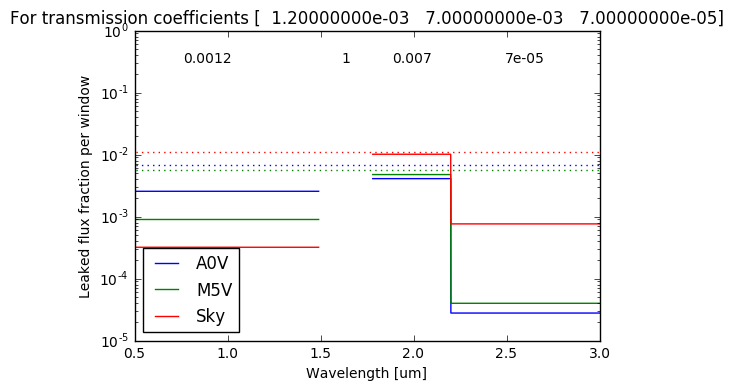

In [55]:
tc_coeffs25 = [1.2E-3, 7E-3, 7E-5]
fwex.get_total_wing_leakage(fluxes3, wavelengths25, tc_coeffs25, row_names=spec_types+["Sky"])

## Transmission coefficients for a selection of 6 filters

| Name | $\lambda_{Blue}$ [um] | $\lambda_{Red}$ [um] | $\Delta \lambda$ [um] |
|------|-------------|------------|------------------|
| J | 1.155 | 1.335 | 0.180 |
| H | 1.490 | 1.780 | 0.290 |
| Ks | 1.970 | 2.320 | 0.350 |
| Pa-$\beta$ | 1.2779 | 1.2950 | 0.017 |
| H-cont | 1.5685 | 1.5915 | 0.023 |
| Br-$\gamma$ | 2.1589 | 2.1878 | 0.029 |

Using the same method, we can generate the "suggested" transmission curves for all 6 filters. For comparison's sake we will begin without the use of a thermal-red blocking filter, and then add one.

### Without a thermal-red blocking filter

In [27]:
filt_names = ["J", "H", "Ks", "Pa-Beta", "H-cont", "Br-Gamma"]
wavelengths_all = [[1.155, 1.335], [1.49, 1.78], [1.97, 2.32],
                [1.2779, 1.295], [1.5685, 1.5915], [2.1589, 2.1878]]
flux_list = []
for waves, names in zip(wavelengths_all, filt_names):
    flux_list += [fwex.get_filter_wings_flux(wavelengths=waves, spec_types=['A0V', 'M5V'],
                                             filter_name=names, return_fluxes=True,
                                             SIM_VERBOSE="no", make_plot=False) ]

[ 1.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.]
[ 0.  0.  0.  0.  1.  1.]
[ 0.3    1.155  1.156  1.335  1.336  3.   ]
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
(2.6160000000000001, 2.9990000000000001) (0.29999999999999999, 2.5)
[ 1.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.]
[ 0.  0.  0.  0.  1.  1.]
[ 0.3    1.49   1.491  1.78   1.781  3.   ]
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., smal

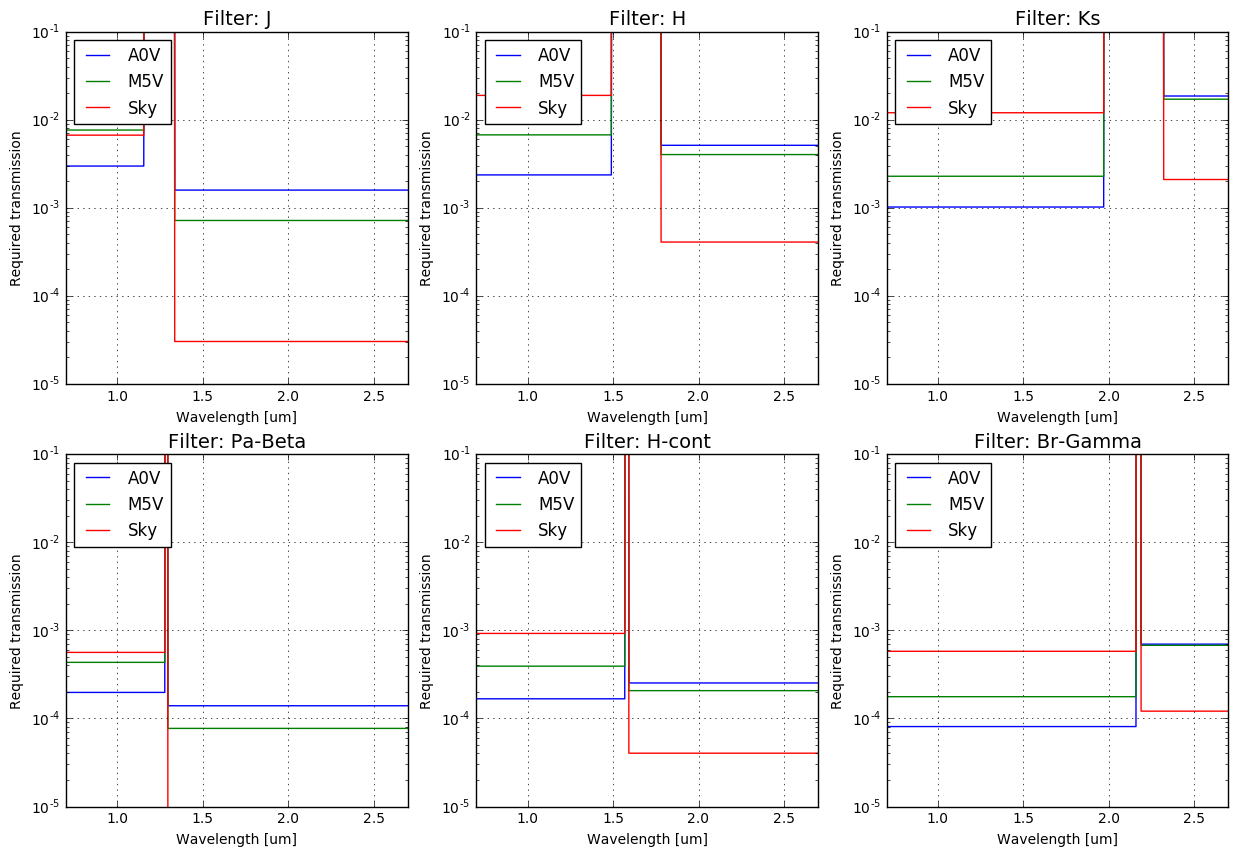

In [28]:
plt.figure(figsize=(15,10))
for flux, waves, name, i in zip(flux_list, wavelengths_all, filt_names, range(1,7)):
    plt.subplot(2,3,i)
    fwex.required_transmission(flux, total_flux_increase=0.01, filter_index=1,
                               wavelengths=waves, row_names=spec_types+["Sky"],
                               make_plot=True)
    plt.title("Filter: "+name, fontsize=14)

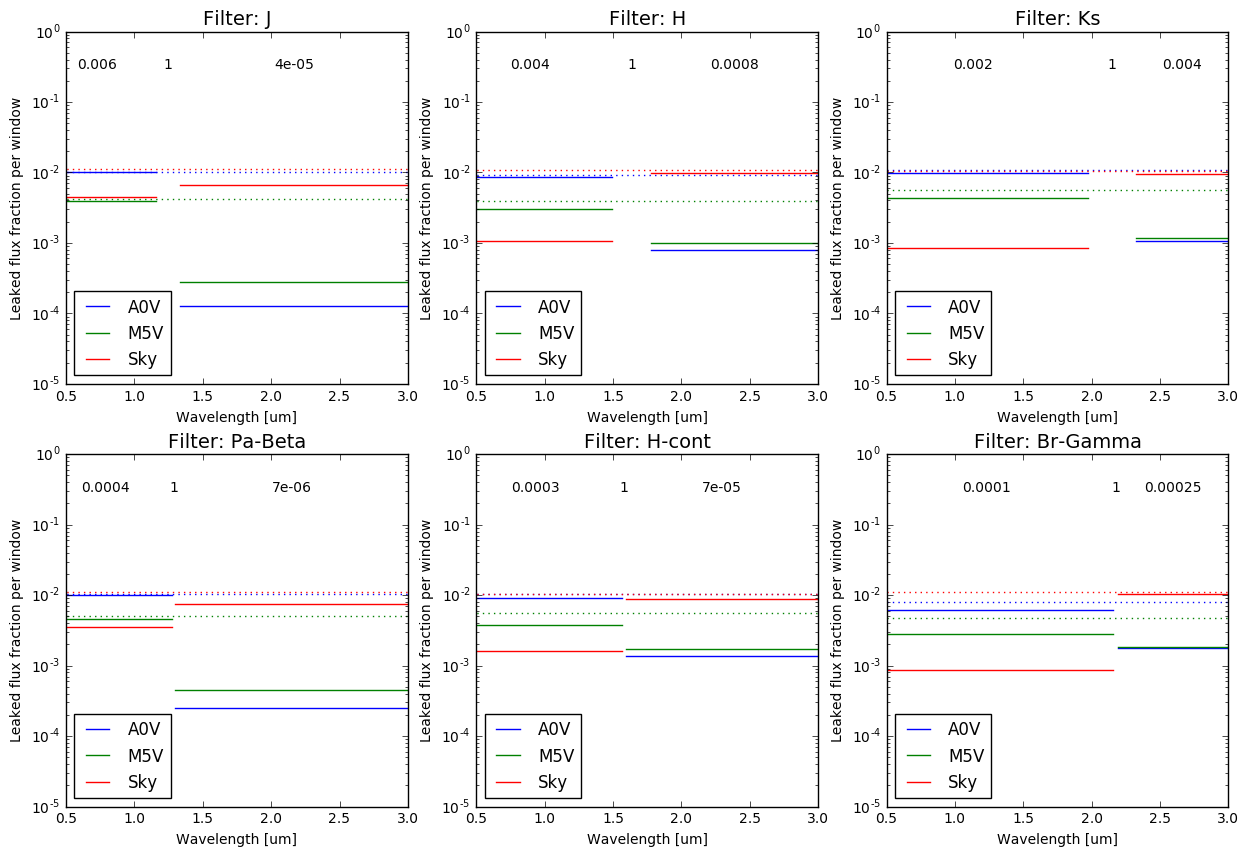

In [53]:
tc_coeffs3 = [[6E-3, 4E-5], [4E-3, 8E-4], [2E-3, 4E-3],
              [4E-4, 7E-6], [3E-4, 7E-5], [1E-4, 2.5E-4]]
tbls = []
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    tbls += [fwex.get_total_wing_leakage(flux_list[i], wavelengths_all[i],
                                         tc_coeffs3[i], row_names=spec_types+["Sky"])]    
    plt.title("Filter: "+filt_names[i], fontsize=14)
    
# Make the table 
arr_coeffs = np.array(tc_coeffs3)
flux_extra = np.array([tbl["Total"].data for tbl in tbls])
data = [filt_names] + list(arr_coeffs[:,:2].T) +list(np.round(flux_extra.T, 4))
summary_tbl = Table(data=data, names=["Filter", "Blue Wing", "Red Wing", "A0V", "M5V", "Sky"])

### With the thermal-red blocking filter

In [58]:
filt_names = ["J", "H", "Ks", "Pa-Beta", "H-cont", "Br-Gamma"]
wavelengths_all2 = [[1.155, 1.335, 2.35], [1.49, 1.78, 2.35], [1.97, 2.32, 2.35],
                [1.2779, 1.295, 2.35], [1.5685, 1.5915, 2.35], [2.1589, 2.1878, 2.35]]
flux_list2 = []
for waves, names in zip(wavelengths_all2, filt_names):
    flux_list2 += [fwex.get_filter_wings_flux(wavelengths=waves, spec_types=['A0V', 'M5V'],
                                              filter_name=names, return_fluxes=True,
                                              SIM_VERBOSE="no", make_plot=False) ]

[ 1.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  1.]
[ 0.3    1.155  1.156  1.335  1.336  2.35   2.351  3.   ]
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
Safety switch is on - Detector(..., small_fov='True')
(2.9900000000000002, 2.9990000000000001) (0.29999999999999999, 2.5)
[ 1.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  

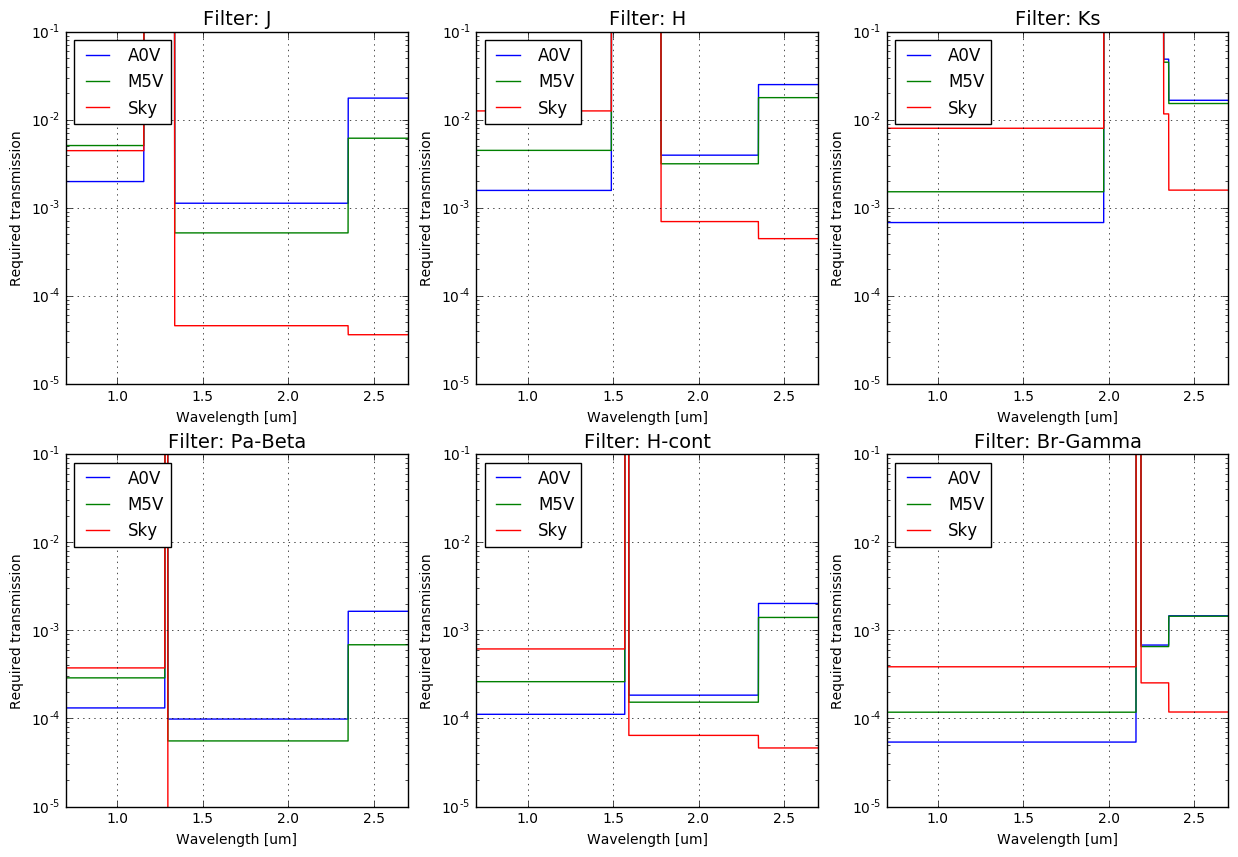

In [59]:
plt.figure(figsize=(15,10))
for flux, waves, name, i in zip(flux_list2, wavelengths_all2, filt_names, range(1,7)):
    plt.subplot(2,3,i)
    fwex.required_transmission(flux, total_flux_increase=0.01, filter_index=1,
                               wavelengths=waves, row_names=spec_types+["Sky"],
                               make_plot=True)
    plt.title("Filter: "+name, fontsize=14)

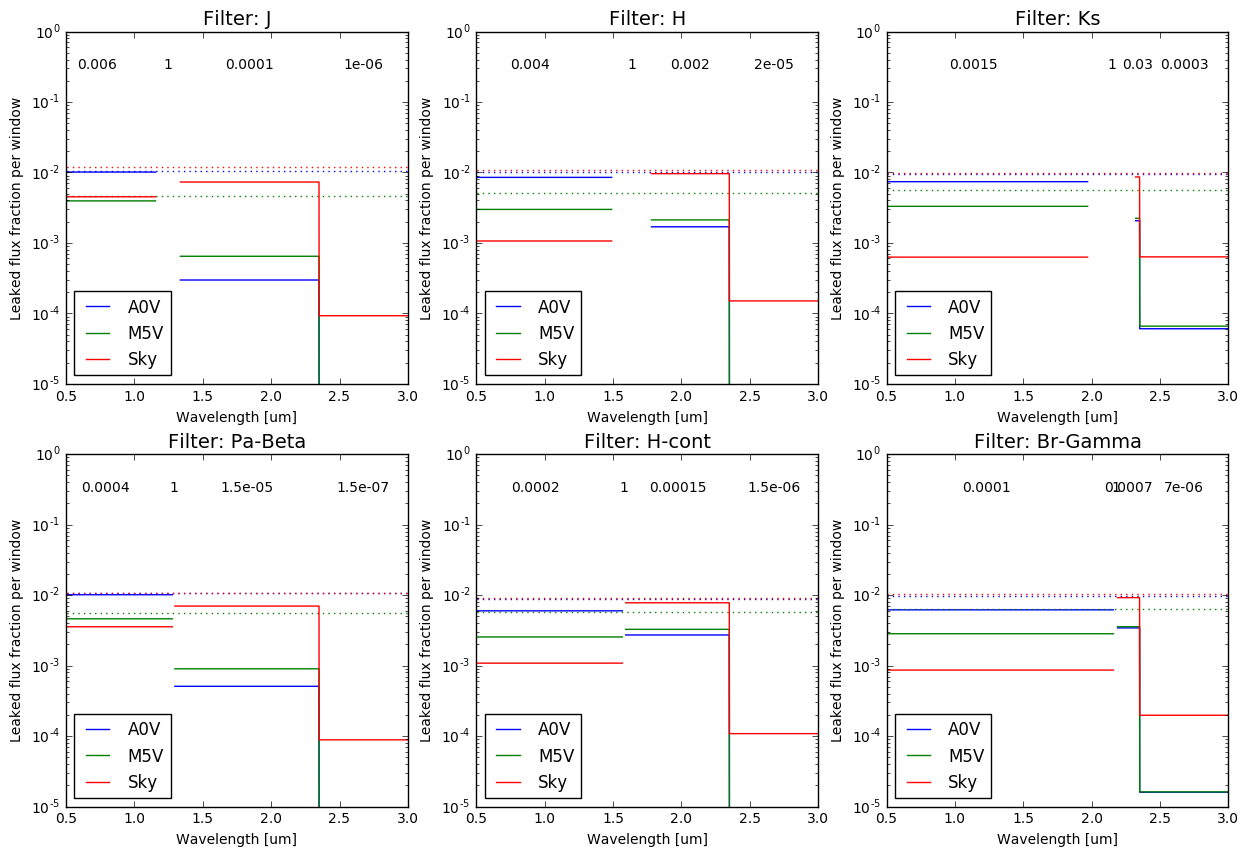

In [60]:
tc_coeffs4 = [[6E-3, 1E-4, 1E-6], [4E-3, 2E-3, 2E-5], [1.5E-3, 3E-2, 3E-4],
              [4E-4, 1.5E-5, 1.5E-7], [2E-4, 1.5E-4, 1.5E-6], [1E-4, 7E-4, 7E-6]]
tbls2 = []
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    tbls2 += [fwex.get_total_wing_leakage(flux_list2[i], wavelengths_all2[i],
                                          tc_coeffs4[i], row_names=spec_types+["Sky"])]    
    plt.title("Filter: "+filt_names[i], fontsize=14)
    
# Make the table 
arr_coeffs = np.array(tc_coeffs4)
flux_extra = np.array([tbl["Total"].data for tbl in tbls2])
data = [filt_names] + list(arr_coeffs[:,:2].T) +list(np.round(flux_extra.T, 4))
summary_tbl2 = Table(data=data, names=["Filter", "Blue Wing", "Red Wing", "A0V", "M5V", "Sky"])

## Summary

The solid lines in the plot above show the fraction of flux due to leakage for each window. **Note** it should be stated that the solid lines are not continuous functions of wavelength, but rather show the integrated flux through the wavelength region defined by the straight line as a fraction of the flux through the actual filter's wavelength range. The dotted lines show the level of the total flux leaked through the wings. Again, this is not a function of wavelength, but merely the total level of flux transmitted through **all** wing windows (blue, red, thermal-red) as a fraction of the total flux through the filter. The numbers above each region are the transmission coefficients for the blue, red and thermal-red wings of the filter. The thermal-red window coefficient is simply a factor of 1E-2 less that the near-red wing. This is because we assume that the thermal-red filter will be a block a the spectral region >2.35um to the tune of 1E-2. Hence blocking on this region is due to both the thermal-red filter and the red-wing of the actual filter.

The table below summarises the plot above. The transmission coefficients for the red and blue wings for each filter are listed in columns 2 and 3, while the total leaked flux fraction due to a combination of the blue, red wings plus a 1E-2 thermal red filter is given in columns 4, 5 and 6 for the two stellar spectra (A0V and M5V) and the sky background emission spectrum.

In [61]:
print("Required wing transmission and total leaked flux fraction")
summary_tbl

Required wing transmission and total leaked flux fraction


Filter,Blue Wing,Red Wing,A0V,M5V,Sky
str8,float64,float64,float64,float64,float64
J,0.006,4e-05,0.0102,0.0042,0.0111
H,0.004,0.0008,0.0093,0.004,0.0109
Ks,0.002,0.004,0.0109,0.0056,0.0104
Pa-Beta,0.0004,7e-06,0.0104,0.0051,0.0109
H-cont,0.0003,7e-05,0.0104,0.0055,0.0103
Br-Gamma,0.0001,0.00025,0.008,0.0047,0.0112


In [62]:
print("Required wing transmission and total leaked flux fraction")
summary_tbl2

Required wing transmission and total leaked flux fraction


Filter,Blue Wing,Red Wing,A0V,M5V,Sky
str8,float64,float64,float64,float64,float64
J,0.006,0.0001,0.0104,0.0046,0.0119
H,0.004,0.002,0.0102,0.0051,0.0108
Ks,0.0015,0.03,0.0095,0.0056,0.0099
Pa-Beta,0.0004,1.5e-05,0.0106,0.0055,0.0106
H-cont,0.0002,0.00015,0.0087,0.0058,0.009
Br-Gamma,0.0001,0.0007,0.0096,0.0064,0.0103


In [85]:
print("Relaxation factor for the Red Wing if a Thermal-Red filter is used")
[filt_names, np.round((summary_tbl2["Red Wing"] / summary_tbl["Red Wing"]).data, 2)]

Relaxation factor for the Red Wing if a Thermal-Red filter is used


[['J', 'H', 'Ks', 'Pa-Beta', 'H-cont', 'Br-Gamma'],
 array([ 2.5 ,  2.5 ,  7.5 ,  2.14,  2.14,  2.8 ])]

The transmission of the blue wing is dominated by the need to have accurate photometry of blue objects (i.e young stellar populstions). Thus a transmission coeffient of between 1.5E-3 and 6E-3 is needed for broad band filters and between 1E-4 and 4E-4 for bnarrow band filters. 

The red transmission requirement on the red wing however is dominated by the need to remove the sky background. By including a thermal-red filter (1E-2 @ >2.35um) in the second filter wheel, we are able to relax the requirements on the transmission of the red-wing by a factor of 2.5 on average. Including the thermal-red filter, the transmission cofficients of between 1E-4 and 3E-2 are needed for the broad band filters and between 1.5E-5 and 7E-4 are needed for the narrow band filters.

## Ideas for future experiments
Some ideas for improving the blocking capabilities of the filter wings:

* Move all the K-band filters to the bottom wheel and have a blue-blocking filter in the top wheel with 1E-2 - similar to the thermal-red blocking filter. 
* Use the broad band filters essentially as blocking filters for the narrow band filters. This means narrow band and broad band filters for the same wavelength region should be on opposite wheels. E.g J-band is on top, but J-cont, J-coro and Pa Beta are below. Then H-band is on the bottom wheel, with NH3, H-cont, H-coro etc on the top wheel, etc.
* Add a full K-band blocker (>1.8um) to remove background for the IYJH broadband filters and beef up the wing blocking on the K band.